In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
import os
from keras import backend as K
import tensorflow as tf
NUM_PARALLEL_EXEC_UNITS = 4
config = tf.ConfigProto(intra_op_parallelism_threads=NUM_PARALLEL_EXEC_UNITS, inter_op_parallelism_threads=2,
                       allow_soft_placement=True, device_count={'CPU': NUM_PARALLEL_EXEC_UNITS})
session = tf.Session(config=config)
K.set_session(session)
os.environ["OMP_NUM_THREADS"] = "4"
os.environ["KMP_BLOCKTIME"] = "30"
os.environ["KMP_SETTINGS"] = "1"
os.environ["KMP_AFFINITY"] = "granularity=fine,verbose,compact,1,0"
pd.set_option('display.max_columns', 100)

In [3]:
train = pd.read_csv("data/porto-seguro-safe-driver-prediction/train.csv")
test = pd.read_csv("data/porto-seguro-safe-driver-prediction/test.csv")

In [4]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [5]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [6]:
train.shape

(595212, 59)

In [7]:
train.drop_duplicates()
train.shape

(595212, 59)

In [8]:
test.shape

(892816, 58)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [10]:
data = []

In [11]:
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
    
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    elif train[f].dtype == int:
        level = 'ordinal'
    
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type
    dtype = train[f].dtype
    
    # Creating a dictionary that contains all the metadata for the variable
    f_dict = {
        'varname' : f,
        'role' : role,
        'level' : level,
        'keep' : keep,
        'dtype' : dtype
    }
    data.append(f_dict)

meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)


In [12]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [13]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [14]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


In [15]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


In [16]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [18]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])
print(nb_0, nb_1)

# Calculate the undersampling rate and resulting number of records with target=0
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train1 = train.loc[idx_list].reset_index(drop=True)

573518 21694
Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


In [19]:
train1.shape

(216940, 59)

In [20]:
vars_with_missing = []

for f in train1.columns:
    missings = train1[train1[f] == -1][f].count()
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train1.shape[0]
        
        print('Variables {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))


Variables ps_ind_02_cat has 103 records (0.05%) with missing values
Variables ps_ind_04_cat has 51 records (0.02%) with missing values
Variables ps_ind_05_cat has 2256 records (1.04%) with missing values
Variables ps_reg_03 has 38580 records (17.78%) with missing values
Variables ps_car_01_cat has 62 records (0.03%) with missing values
Variables ps_car_02_cat has 2 records (0.00%) with missing values
Variables ps_car_03_cat has 148367 records (68.39%) with missing values
Variables ps_car_05_cat has 96026 records (44.26%) with missing values
Variables ps_car_07_cat has 4431 records (2.04%) with missing values
Variables ps_car_09_cat has 230 records (0.11%) with missing values
Variables ps_car_11 has 1 records (0.00%) with missing values
Variables ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


ps_car_03_cat and ps_car_05_cat have a large proportion of records with missing values. Remove these variables.
For the other categorical variables with missing values, we can leave the missing value -1 as such.
ps_reg_03 (continuous) has missing values for 18% of all records. Replace by the mean.
ps_car_11 (ordinal) has only 5 records with misisng values. Replace by the mode.
ps_car_12 (continuous) has only 1 records with missing value. Replace by the mean.
ps_car_14 (continuous) has missing values for 7% of all records. Replace by the mean.

In [21]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train1.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop), 'keep'] = False #Updating the meta table

# Imputing with the mean or mode
mean_imp = Imputer(missing_values=-1, strategy='mean', axis = 0)
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)
train1['ps_reg_03'] = mean_imp.fit_transform(train1[['ps_reg_03']]).ravel()
train1['ps_car_12'] = mean_imp.fit_transform(train1[['ps_car_12']]).ravel()
train1['ps_car_14'] = mean_imp.fit_transform(train1[['ps_car_14']]).ravel()
train1['ps_car_11'] = mode_imp.fit_transform(train1[['ps_car_14']]).ravel()

/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/davidwan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Checking the cardinality of the categorical variables

In [22]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train1[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [23]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
        # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [24]:
train_encoded, test_encoded = target_encode(train1["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train1.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train1['ps_car_11_cat_te'] = train_encoded
train1.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

<Figure size 432x288 with 0 Axes>

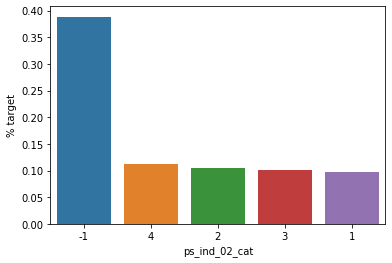

<Figure size 432x288 with 0 Axes>

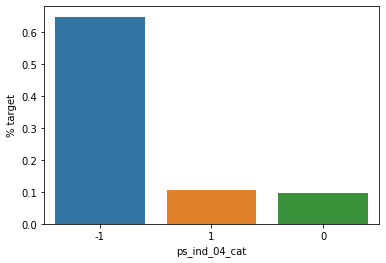

<Figure size 432x288 with 0 Axes>

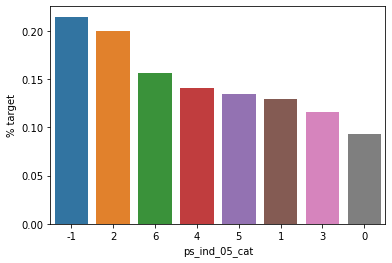

<Figure size 432x288 with 0 Axes>

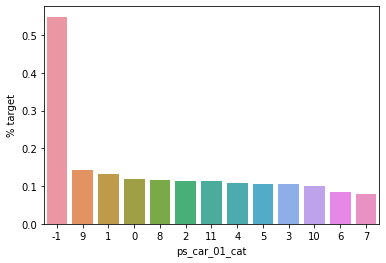

<Figure size 432x288 with 0 Axes>

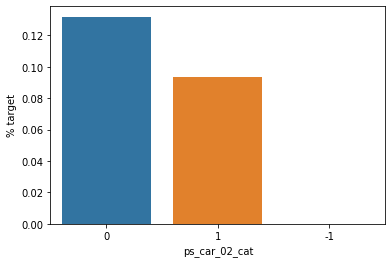

<Figure size 432x288 with 0 Axes>

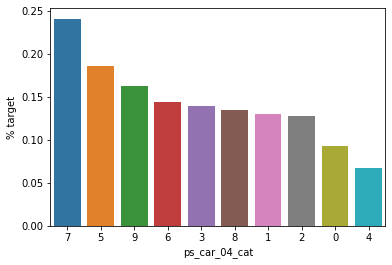

<Figure size 432x288 with 0 Axes>

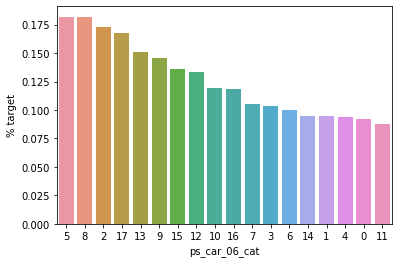

<Figure size 432x288 with 0 Axes>

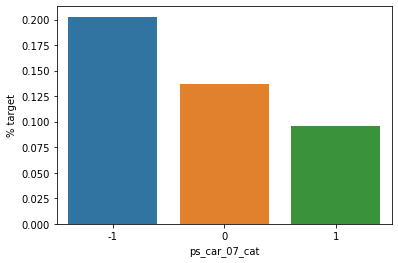

<Figure size 432x288 with 0 Axes>

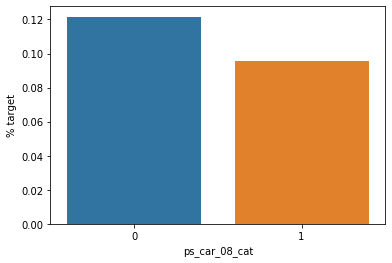

<Figure size 432x288 with 0 Axes>

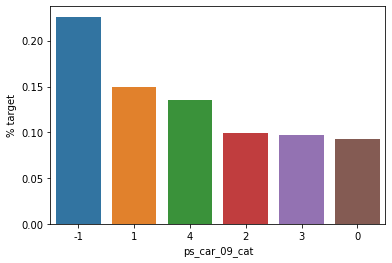

<Figure size 432x288 with 0 Axes>

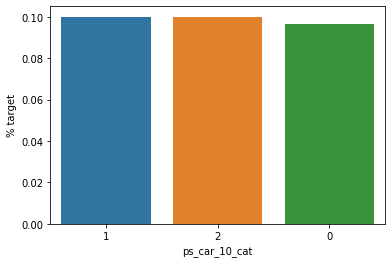

In [25]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots()
    # Calculate the percentage of target=1 per category value
    cat_perc = train1[[f, 'target']].groupby([f], as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target')
    plt.xlabel(f)
    plt.tick_params(axis='both', which='major')
    plt.show();

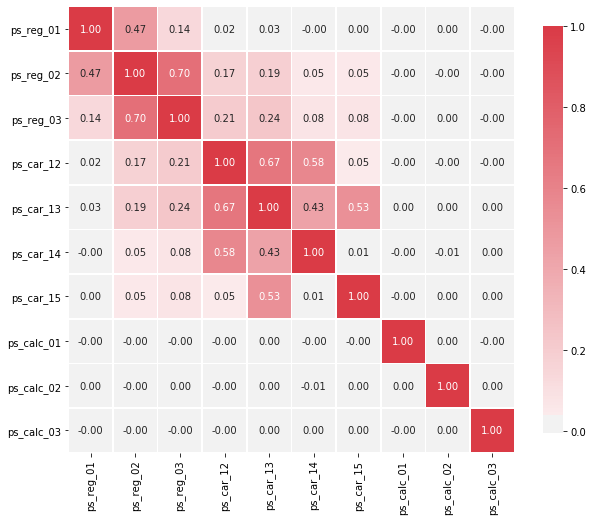

In [26]:
def corr_heatmap(v):
    correlations = train1[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

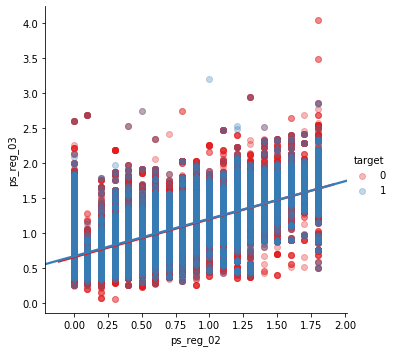

In [27]:
#ps_reg_02 and ps_reg_03 
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=train1, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

The regression line shows that thereis a linear relationship betwen these variables

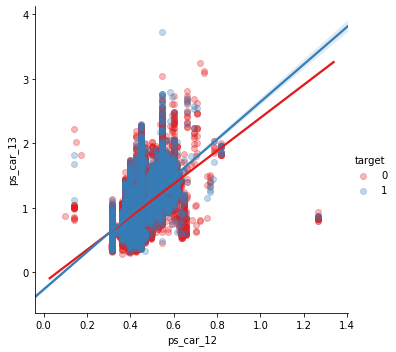

In [28]:
#ps_car_12 and ps_car_13
sns.lmplot(x='ps_car_12', y='ps_car_13', data=train1, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

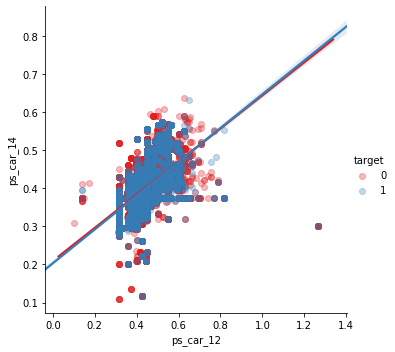

In [29]:
#ps_car_12 and ps_car_14
sns.lmplot(x='ps_car_12', y='ps_car_14', data=train1, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()


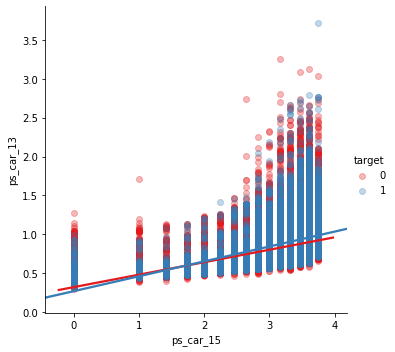

In [30]:
#ps_car_13 and ps_car_15
sns.lmplot(x='ps_car_15', y='ps_car_13', data=train1, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

We will let the model reduce the dimensions as the number of features is relatively low

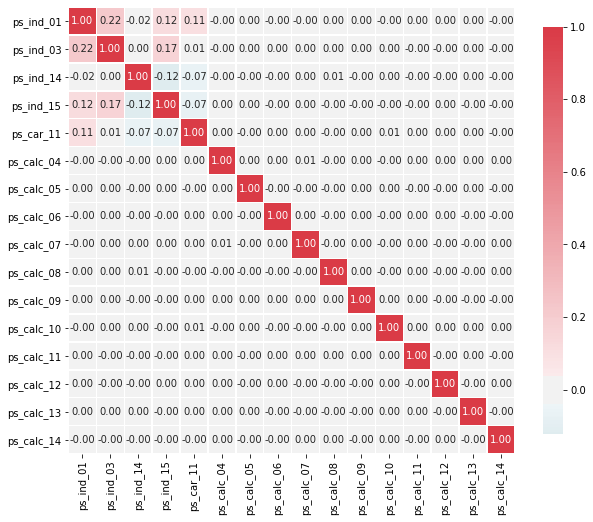

In [31]:
#Checking the correlations between ordinal variables¶
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

In [32]:
#Create dummy variables for categorical variables
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train1.shape[1]))
train1 = pd.get_dummies(train1, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train1.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


In [33]:
#Creating interaction variables
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train1[v]), columns=poly.get_feature_names(v))
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('Before creating interactions we have {} variables in train'.format(train1.shape[1]))
train1 = pd.concat([train1, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train1.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


In [34]:
#Removing features with low or zero variance
selector = VarianceThreshold(threshold=.01)
selector.fit(train1.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables
f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements
v = train1.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

29 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_11', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [35]:
#Selecting features with a Random Forest and SelectFromModel
X_train = train1.drop(['id', 'target'], axis=1)
y_train = train1['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

 1) ps_car_11_cat_te               0.020994
 2) ps_car_13                      0.017304
 3) ps_car_13^2                    0.017290
 4) ps_car_12 ps_car_13            0.017181
 5) ps_reg_03 ps_car_13            0.017040
 6) ps_car_13 ps_car_14            0.016848
 7) ps_reg_01 ps_car_13            0.016719
 8) ps_car_13 ps_car_15            0.016694
 9) ps_reg_03 ps_car_14            0.016044
10) ps_reg_03 ps_car_12            0.015487
11) ps_reg_03 ps_car_15            0.015018
12) ps_car_14 ps_car_15            0.014782
13) ps_car_13 ps_calc_01           0.014677
14) ps_car_13 ps_calc_03           0.014604
15) ps_car_13 ps_calc_02           0.014566
16) ps_reg_01 ps_reg_03            0.014558
17) ps_reg_02 ps_car_13            0.014555
18) ps_reg_03                      0.014160
19) ps_reg_03^2                    0.014112
20) ps_reg_01 ps_car_14            0.014071
21) ps_reg_03 ps_calc_02           0.013759
22) ps_reg_03 ps_calc_01           0.013700
23) ps_reg_03 ps_calc_03        

In [36]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162
Number of features after selection: 81


In [36]:
train1 = train1[selected_vars + ['target']]

In [37]:
scaler = StandardScaler()
scaler.fit_transform(train1.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])

In [38]:
train1.head()

,ps_ind_01,ps_ind_03,ps_ind_15,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_car_11_cat_te,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2,target
0,1,1,11,0.6,0.6,0.838153,0.345688,0.368782,0.540603,0.345688,2.000000,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0.095523,0.36,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.36,0.502892,0.221269,0.324362,0.207413,1.200000,0.54,0.18,0.00,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.000000,0.292252,0.186880,1.081207,0.486543,0.162181,0.000000,0.1195,0.691375,0.311119,0.103706,0.000000,4.0,1.800000,0.600000,0.000000,0.81,0.27,0.00,0.09,0.00,0.00,0
1,5,7,5,0.9,0.6,0.728440,0.378814,0.424264,0.382953,0.378814,0.000000,0.2,0.0,0.6,1,1,7,5,10,4,11,3,0,3,7,0.121376,0.81,0.54,0.655596,0.381838,0.344658,0.340933,0.000000,0.18,0.00,0.54,0.36,0.437064,0.254558,0.229772,0.227288,0.000000,0.12,0.00,0.36,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.180,0.162473,0.160717,0.000000,0.084853,0.000000,0.254558,0.146653,0.145068,0.000000,0.076591,0.000000,0.229772,0.1435,0.000000,0.075763,0.000000,0.227288,0.0,0.000000,0.000000,0.000000,0.04,0.00,0.12,0.00,0.00,0.36,0
2,4,3,4,0.9,0.6,0.869267,0.402368,0.400000,0.814271,0.402368,3.316625,0.3,0.9,0.1,4,1,8,5,10,2,8,7,2,3,10,0.095021,0.81,0.54,0.782340,0.360000,0.732844,0.362131,2.984962,0.27,0.81,0.09,0.36,0.521560,0.240000,0.488563,0.241421,1.989975,0.18,0.54,0.06,0.755625,0.347707,0.707819,0.349765,2.883032,0.260780,0.782340,0.086927,0.160,0.325708,0.160947,1.326650,0.120000,0.360000,0.040000,0.663037,0.327637,2.700631,0.244281,0.732844,0.081427,0.1619,1.334504,0.120710,0.362131,0.040237,11.0,0.994987,2.984962,0.331662,0.09,0.27,0.03,0.81,0.09,0.01,0
3,6,6,8,0.6,1.5,1.705872,0.378418,0.400000,0.838387,0.378418,3.605551,0.8,0.4,0.1,3,3,7,2,11,3,10,2,2,0,14,0.087444,0.36,0.90,1.023523,0.240000,0.503032,0.227051,2.163331,0.48,0.24,0.06,2.25,2.558808,0.600000,1.257580,0.567627,5.408327,1.20,0.60,0.15,2.910000,0.682349,1.430181,0.645532,6.150610,1.364698,0.682349,0.170587,0.160,0.335355,0.151367,1.442221,0.320000,0.160000,0.040000,0.702893,0.317260,3.022847,0.670710,0.335355,0.083839,0.1432,1.364405,0.302734,0.151367,0.037842,13.0,2.884441,1.442221,0.360555,0.64,0.32,0.08,0.16,0.04,0.01,0
4,5,5,10,0.8,0.8,1.086566,0.384838,0.400000,0.905777,0.384838,3.605551,0.6,0.5,0.9,3,3,5,2,9,1,6,5,1,6,8,0.108118,0.64,0.64,0.869253,0.320000,0.724622,0.307870,2.884441,0.48,0.40,0.72,0.64,0.869253,0.320000,0.724622,0.307870,2.884441,0.48,0.40,0.72,1.180625,0.434626,0.984186,0.418151,3.917668,0.651939,0.543283,0.977909,0.160,0.362311,0.153935,1.442221,0.240000,0.200000,0.360000,0.820432,0.348577,3.265825,0.543466,0.452888,0.815199,0.1481,1.387552,0.230903,0.192419,0.346354,13.0,2.163331

In [39]:
train1.shape

(216940, 82)

In [40]:
train1.columns

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02',
       'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_car_11_cat_te', 'ps_reg_01^2', 'ps_reg_01 ps_reg_02',
       'ps_reg_01 ps_reg_03', 'ps_reg_01 ps_car_12', 'ps_reg_01 ps_car_13',
       'ps_reg_01 ps_car_14', 'ps_reg_01 ps_car_15', 'ps_reg_01 ps_calc_01',
       'ps_reg_01 ps_calc_02', 'ps_reg_01 ps_calc_03', 'ps_reg_02^2',
       'ps_reg_02 ps_reg_03', 'ps_reg_02 ps_car_12', 'ps_reg_02 ps_car_13',
       'ps_reg_02 ps_car_14', 'ps_reg_02 ps_car_15', 'ps_reg_02 ps_calc_01',
       'ps_reg_02 ps_calc_02', 'ps_reg_02 ps_calc_03', 'ps_reg_03^2',
       'ps_reg_03 ps_car_12', 'ps_reg_03 ps_car_13', 'ps_reg_03 ps_car_14',
       'ps_reg_03 ps_car_15', 'ps_reg_0

In [41]:
X = train1.drop('target',axis=1)
y = train1['target']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [44]:
import numpy as np
import pandas as pd

%env KERAS_BACKEND=theano

from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import custom_object_scope
from keras import callbacks

from sklearn.metrics import roc_auc_score
from sklearn import preprocessing

import theano

env: KERAS_BACKEND=theano


Using Theano backend.


In [45]:
def soft_AUC_theano(y_true, y_pred):
    # Extract 1s
    pos_pred_vr = y_pred[y_true.nonzero()]
    # Extract zeroes
    neg_pred_vr = y_pred[theano.tensor.eq(y_true, 0).nonzero()]
    # Broadcast the subtraction to give a matrix of differences  between pairs of observations.
    pred_diffs_vr = pos_pred_vr.dimshuffle(0, 'x') - neg_pred_vr.dimshuffle('x', 0)
    # Get signmoid of each pair.
    stats = theano.tensor.nnet.sigmoid(pred_diffs_vr * 2)
    # Take average and reverse sign
    return 1-theano.tensor.mean(stats) # as we want to minimise, and get this to zero

In [46]:
class AUC_SKlearn_callback(callbacks.Callback):
    def __init__(self, X_train, y_train, useCv = True):
        super(AUC_SKlearn_callback, self).__init__()
        self.bestAucCv = 0
        self.bestAucTrain = 0
        self.cvLosses = []
        self.bestCvLoss = 1,
        self.X_train = X_train
        self.y_train = y_train
        self.useCv = useCv

    def on_train_begin(self, logs={}):
        return

    def on_train_end(self, logs={}):
        return

    def on_epoch_begin(self, epoch, logs={}):
        return

    def on_epoch_end(self, epoch, logs={}):
        train_pred = self.model.predict(np.array(self.X_train))
        aucTrain = roc_auc_score(self.y_train, train_pred)
        print("SKLearn Train AUC score: " + str(aucTrain))

        if (self.bestAucTrain < aucTrain):
            self.bestAucTrain = aucTrain
            print ("Best SKlearn AUC training score so far")
            #**TODO: Add your own logging/saving/record keeping code here
        if (self.useCv) :
            cv_pred = self.model.predict(self.validation_data[0])
            aucCv = roc_auc_score(self.validation_data[1], cv_pred)
            print ("SKLearn CV AUC score: " +  str(aucCv))

            if (self.bestAucCv < aucCv) :
                # Great! New best *actual* CV AUC found (as opposed to the proxy AUC surface we are descending)
                print("Best SKLearn genuine AUC so far so saving model")
                self.bestAucCv = aucCv

                # **TODO: Add your own logging/model saving/record keeping code here.
                self.model.save("best_auc_model.h5", overwrite=True)

            vl = logs.get('val_loss')
            if (self.bestCvLoss < vl) :
                print("Best val loss on SoftAUC so far")
                #**TODO -  Add your own logging/saving/record keeping code here.
        return

    def on_batch_begin(self, batch, logs={}):
        return

    def on_batch_end(self, batch, logs={}):
        # logs include loss, and optionally acc( if accuracy monitoring is enabled).
        return

In [47]:
# Create the model.
def create_model_AUC(input_dim, first_layer_size, second_layer_size, third_layer_size, lr, l2reg, dropout):
    return create_model(input_dim, first_layer_size, second_layer_size, third_layer_size, lr, l2reg, dropout, "AUC")

def create_model_bce(input_dim, first_layer_size, second_layer_size, third_layer_size, lr, l2reg, dropout):
    return create_model(input_dim, first_layer_size, second_layer_size, third_layer_size, lr, l2reg, dropout, "crossentropy")


def create_model(input_dim, first_layer_size, second_layer_size, third_layer_size, lr, l2reg, dropout, mode="AUC") :
    print("Creating model with input dim ", input_dim)
    # likely to need tuning!
    reg = regularizers.l2(l2reg)

    model = Sequential()

    model.add(Dense(units=first_layer_size, kernel_initializer='lecun_normal', kernel_regularizer=reg, activation='relu', input_dim=input_dim))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(Dense(units=second_layer_size, kernel_initializer='lecun_normal', activation='relu', kernel_regularizer=reg))
    model.add(BatchNormalization(axis=1))
    model.add(Dropout(dropout))

    model.add(Dense(units=third_layer_size, kernel_initializer='lecun_normal', activation='relu', kernel_regularizer=reg))
    model.add(BatchNormalization())
    model.add(Dropout(dropout))

    model.add(Dense(1, kernel_initializer='lecun_normal', activation='sigmoid'))

    # classifier.compile(loss='mean_absolute_error', optimizer='rmsprop', metrics=['mae', 'accuracy'])
    opt = Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
    if (mode == "AUC"):
        model.compile(loss=soft_AUC_theano, metrics=[soft_AUC_theano], optimizer=opt)  # not sure whether to use metrics here?
    else:
        model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=opt)  # not sure whether to use metrics here?
    return model


def train_model( X_train, y_train, model, valSplit=0.15, epochs = 30, batch_size = 4096):

    callbacksList = [AUC_SKlearn_callback(X_train, y_train, useCv = (valSplit > 0))]
    if (valSplit > 0) :
        early_stopping = callbacks.EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=5,
                                                       verbose=2, mode='min')
        callbacksList.append( early_stopping )
    return model.fit(x=np.array(X_train), y=np.array(y_train),
                        callbacks=callbacksList, validation_split=valSplit,
                        verbose=2, batch_size=batch_size, epochs=epochs)                     

In [48]:
def get_data() :



    return X_train, X_test, y_train

In [51]:
def makeOutputFile(pred_fun, test, subsFile) :
    df_out = pd.DataFrame(index=test.index)
    y_pred = pred_fun( test )
    df_out['target'] = y_pred
    df_out.to_csv(subsFile, index_label="id")

def main() :
    X_train, X_test, y_train = get_data()
    model = create_model( input_dim=X_train.shape[1],
                          first_layer_size=162,
                          second_layer_size=81,
                          third_layer_size=81,
                          lr=0.0001,
                          l2reg = 0.1,
                          dropout = 0.2,
                          mode="AUC")

    train_model(X_train, y_train, model)

    with custom_object_scope({'soft_AUC_theano': soft_AUC_theano}):
        pred_fun = lambda x: model.predict(np.array(x))
        makeOutputFile(pred_fun, X_test, "auc.csv")

    model = create_model_bce( input_dim=X_train.shape[1],
                          first_layer_size=300,
                          second_layer_size=200,
                          third_layer_size=200,
                          lr=0.0001,
                          l2reg = 0.1,
                          dropout = 0.2)

    train_model(X_train, y_train, model)

    pred_fun = lambda x: model.predict(np.array(x))
    makeOutputFile(pred_fun, X_test, "no_auc.csv")

main()

Creating model with input dim  81
Train on 147519 samples, validate on 26033 samples
Epoch 1/30
 - 6s - loss: 33.0165 - soft_AUC_theano: 0.4982 - val_loss: 32.0003 - val_soft_AUC_theano: 0.4958
SKLearn Train AUC score: 0.5175900838826061
Best SKlearn AUC training score so far
SKLearn CV AUC score: 0.5320642689560321
Best SKLearn genuine AUC so far so saving model
Best val loss on SoftAUC so far
Epoch 2/30
 - 7s - loss: 31.1305 - soft_AUC_theano: 0.4979 - val_loss: 30.1769 - val_soft_AUC_theano: 0.4949
SKLearn Train AUC score: 0.5211513991720182
Best SKlearn AUC training score so far
SKLearn CV AUC score: 0.5355304892534415
Best SKLearn genuine AUC so far so saving model
Best val loss on SoftAUC so far
Epoch 3/30
 - 7s - loss: 29.3588 - soft_AUC_theano: 0.4953 - val_loss: 28.4653 - val_soft_AUC_theano: 0.4940
SKLearn Train AUC score: 0.5259991577855364
Best SKlearn AUC training score so far
SKLearn CV AUC score: 0.5388826736696808
Best SKLearn genuine AUC so far so saving model
Best val

 - 7s - loss: 7.3372 - soft_AUC_theano: 0.4602 - val_loss: 7.1168 - val_soft_AUC_theano: 0.4615
SKLearn Train AUC score: 0.5897204964009246
Best SKlearn AUC training score so far
SKLearn CV AUC score: 0.5859177407592585
Best SKLearn genuine AUC so far so saving model
Best val loss on SoftAUC so far
Epoch 28/30
 - 6s - loss: 6.9240 - soft_AUC_theano: 0.4604 - val_loss: 6.7148 - val_soft_AUC_theano: 0.4606
SKLearn Train AUC score: 0.5905550986691647
Best SKlearn AUC training score so far
SKLearn CV AUC score: 0.5870753122215783
Best SKLearn genuine AUC so far so saving model
Best val loss on SoftAUC so far
Epoch 29/30
 - 7s - loss: 6.5320 - soft_AUC_theano: 0.4587 - val_loss: 6.3358 - val_soft_AUC_theano: 0.4602
SKLearn Train AUC score: 0.5909554215143351
Best SKlearn AUC training score so far
SKLearn CV AUC score: 0.5872237734039863
Best SKLearn genuine AUC so far so saving model
Best val loss on SoftAUC so far
Epoch 30/30
 - 7s - loss: 6.1633 - soft_AUC_theano: 0.4585 - val_loss: 5.978

SKLearn Train AUC score: 0.5706384677264162
SKLearn CV AUC score: 0.5599471974193283
Best val loss on SoftAUC so far
Epoch 28/30
 - 12s - loss: 9.8550 - acc: 0.8853 - val_loss: 9.4612 - val_acc: 0.9012
SKLearn Train AUC score: 0.5760378376072315
Best SKlearn AUC training score so far
SKLearn CV AUC score: 0.5613380922419154
Best val loss on SoftAUC so far
Epoch 29/30
 - 11s - loss: 9.1896 - acc: 0.8867 - val_loss: 8.8183 - val_acc: 0.9012
SKLearn Train AUC score: 0.5840356493106376
Best SKlearn AUC training score so far
SKLearn CV AUC score: 0.5709090631977626
Best SKLearn genuine AUC so far so saving model
Best val loss on SoftAUC so far
Epoch 30/30
 - 12s - loss: 8.5687 - acc: 0.8883 - val_loss: 8.2240 - val_acc: 0.9012
SKLearn Train AUC score: 0.5825651619235538
SKLearn CV AUC score: 0.5670514497557925
Best val loss on SoftAUC so far
